In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [33]:
# Make a simple test data
times = np.array([0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4.0, 4.25, 4.5, 4.75, 5.0, 5.5])
passed = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# Create X and y
# Add a 1 column to X
X = np.concatenate((times.reshape(-1, 1), np.ones(len(times)).reshape(-1, 1)), axis=1)
y = passed

# Part 1. Stochatic

#### Prepare

In [84]:
# The input has two part: X and y
# X has dimension of m, n
# y has dimension of m, 1
# Everything here is numpy array

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def compute_y_hat(theta, x):
  return sigmoid(np.dot(theta, x))

def compute_loss(y , y_hat):
  return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def compute_gradient(x, y, y_hat):
  return (y_hat - y) * x

def update_weight(old_theta, gradient, lr):
  new_theta = old_theta - lr * gradient
  return new_theta

def init_theta(l):
  return np.array([random.random() for i in range(l)])

def predict(theta, x):
  return np.round(compute_y_hat(theta, x), 2)


#### Full version

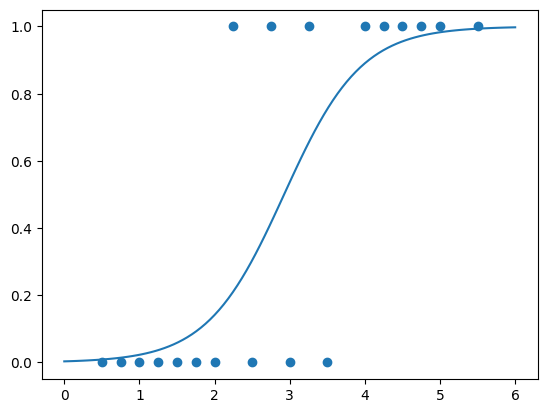

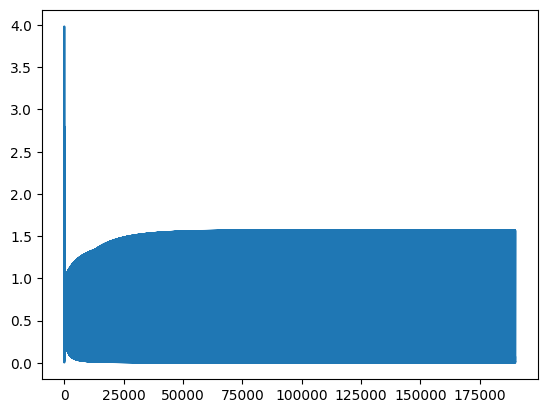

Final loss: 0.006594112833714401


In [86]:
def stochatic_logistic_regression(X, y, theta, lr, epochs):
  losses = []
  for _ in range(epochs):
    for row in range(len(X)):
      x_sample = X[row]
      y_sample = y[row]

      y_hat = compute_y_hat(theta, x_sample)
      loss = compute_loss(y_sample, y_hat)
      losses.append(loss)
      gradient = compute_gradient(x_sample, y_sample, y_hat)
      theta = update_weight(theta, gradient, lr)
  return theta, losses

theta = np.array([1, 1])
theta, losses = stochatic_logistic_regression(X, y, theta, 0.01, 10000)
plt.scatter(times, passed)
# Plot the y_hat function
plt.plot(np.linspace(0, 6, 100), [compute_y_hat(theta, np.array([x, 1])) for x in np.linspace(0, 6, 100)])
plt.show()
# Show the losses
plt.plot(losses)
plt.show()
print(f"Final loss: {losses[-1]}")

# Part 2. Mini Batch

#### Prepare

In [88]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def compute_y_hat(X, theta):
  return sigmoid(np.dot(X, theta))

def compute_loss(y, y_hat):
  m = len(y)
  return -1/m * (np.dot(y.T, np.log(y_hat)) + np.dot((1 - y).T, np.log(1 - y_hat)))

def compute_gradient(X, y, y_hat):
  m = len(y)
  return 1/m * np.dot(X.T, (y_hat - y))

def update_weight(old_theta, gradient, lr):
  new_theta = old_theta - lr * gradient
  return new_theta

def minibatch_logistic_regression(X, y, theta, lr, epochs, batch_size):
  m = X.shape[0]
  losses = []

  for _ in range(epochs):
    # Shuffle the dataset
    indices = np.arange(m)
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    for i in range(0, m, batch_size):
      end = i + batch_size
      if end > m:
        end = m
      X_batch = X[i:end]
      y_batch = y[i:end]

      y_hat = compute_y_hat(X_batch, theta)
      loss = compute_loss(y_batch, y_hat)
      losses.append(loss)
      gradient = compute_gradient(X_batch, y_batch, y_hat)
      theta = update_weight(theta, gradient, lr)

  return theta, losses

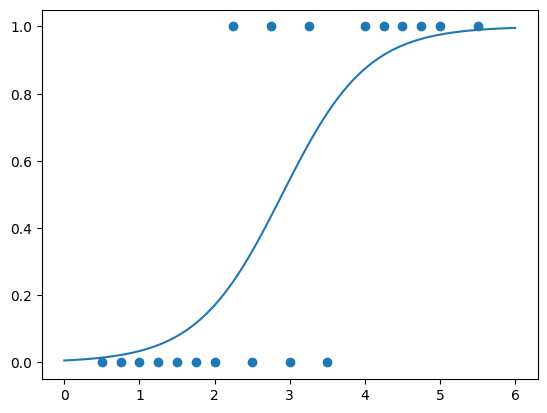

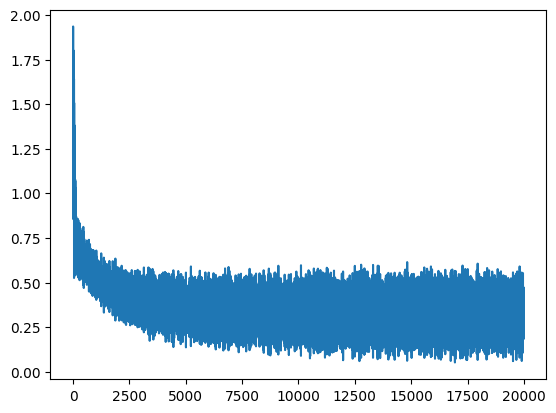

In [78]:
lr = 0.01
epochs = 10000
theta = np.array([1, 1])
batch_size = 10

theta, losses = minibatch_logistic_regression(X, y, theta, lr, epochs, batch_size)
plt.scatter(times, passed)
# Plot the y_hat function
plt.plot(np.linspace(0, 6, 100), [compute_y_hat(theta, np.array([x, 1])) for x in np.linspace(0, 6, 100)])
plt.show()
# Show the losses
plt.plot(losses)
plt.show()

# Part 3.Batch

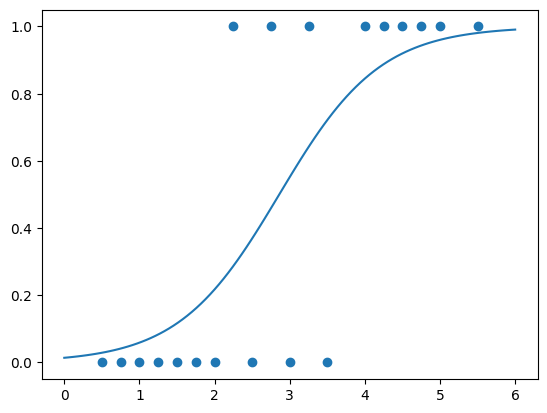

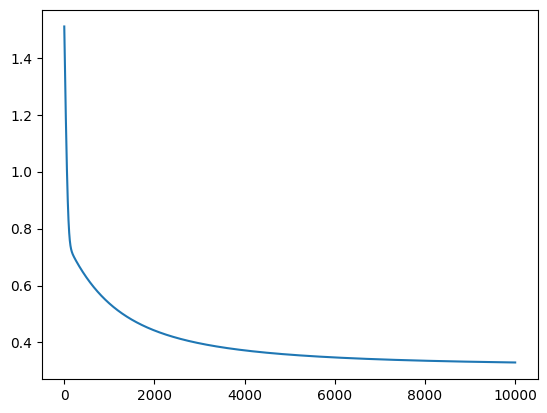

Final loss: 0.3297422690172085


In [91]:
lr = 0.01
epochs = 10000
theta = np.array([1, 1])
batch_size = 19

theta, losses = minibatch_logistic_regression(X, y, theta, lr, epochs, batch_size)
plt.scatter(times, passed)
# Plot the y_hat function
plt.plot(np.linspace(0, 6, 100), [compute_y_hat(theta, np.array([x, 1])) for x in np.linspace(0, 6, 100)])
plt.show()
# Show the losses
plt.plot(losses)
plt.show()

print(f"Final loss: {losses[-1]}")